#  Note the marker definitions:
- marker0=video_topleft
- marker1=video_topright
- marker2=video_bottomright
- marker3=video_bottomleft

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
def plot_markers_for_image(marker_df):
    """
    Plot an image and overlay markers with different colors and annotated marker numbers.
    
    Parameters:
        marker_df (DataFrame): A subset of df_markers containing markers from the same image/timestamp.
                               Assumes that all rows share the same filename.
    """
    if marker_df.empty:
        print("No markers provided!")
        return
    
    # Get the filename (assuming all markers refer to the same image)
    filename = marker_df.iloc[0]['filename']
    
    # Check if the file exists (optional)
    if not os.path.exists(filename):
        print(f"File not found: {filename}")
        return
    
    # Load the image
    image = mpimg.imread(filename)
    
    # Create a figure
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    
    # Define a list of colors (one for each marker)
    colors = ['red', 'blue', 'green', 'orange']  # Adjust or extend if more markers
    
    # Loop over the markers and plot each with a distinct color
    for _, row in marker_df.iterrows():
        marker_num = int(row['marker_num'])
        # Cycle through the colors in case there are more markers than colors
        color = colors[marker_num % len(colors)]
        x, y = row['x'], row['y']
        plt.scatter(x, y, c=color, s=50)
        # Annotate with the marker number
        plt.annotate(str(marker_num), (x, y), color=color, fontsize=12, fontweight='bold',
                     xytext=(5, 5), textcoords='offset points')
    
    plt.axis('off')
    plt.show()

In [5]:
framedir_hd =  '/mnt/trove/wdd/wdd_videos_2024/single_camera_frames/'
framedir_wdd = '/mnt/trove/wdd/wdd_output_2024/fullframes/'

df_markers_hd = pd.read_csv(os.path.join(framedir_hd,'df_markers.csv'))
df_markers_wdd = pd.read_csv(os.path.join(framedir_wdd,'df_markers.csv'))

In [9]:
df_markers_hd.head()

,cam_id,timestamp,marker_num,x,y,marker_type,score,filename
0,1,2024-08-14 15:23:37+00:00,0,354.04,113.56,False,10485.892361,/mnt/trove/wdd/wdd_videos_2024/single_camera_f...
1,1,2024-08-14 15:23:37+00:00,1,3379.44,100.20,False,10272.300347,/mnt/trove/wdd/wdd_videos_2024/single_camera_f...
2,1,2024-08-14 15:23:37+00:00,2,347.36,4444.72,True,18716.315972,/mnt/trove/wdd/wdd_videos_2024/single_camera_f...
3,1,2024-08-14 15:23:37+00:00,3,3366.08,4484.80,False,13266.594618,/mnt/trove/wdd/wdd_videos_2024/single_camera_f...
4,1,2024-08-22 12:47:26+00:00,0,347.36,86.84,False,10341.537326,/mnt/trove/wdd/wdd_videos_2024/single_camera_f...


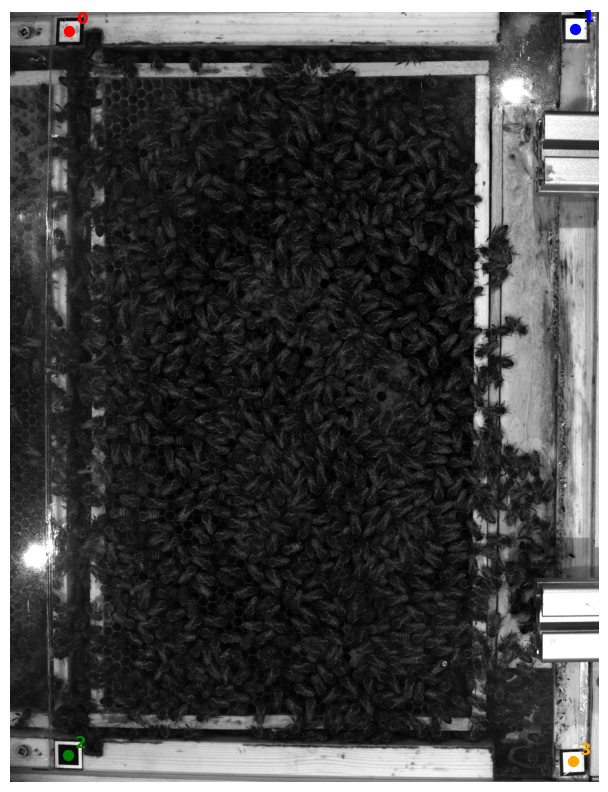

In [16]:
# visualize a single one
timestamps = df_markers_hd['timestamp'].unique()
timestamp_to_show = timestamps[0]
dfsel = df_markers_hd[df_markers_hd['timestamp']==timestamp_to_show]
plot_markers_for_image(dfsel)

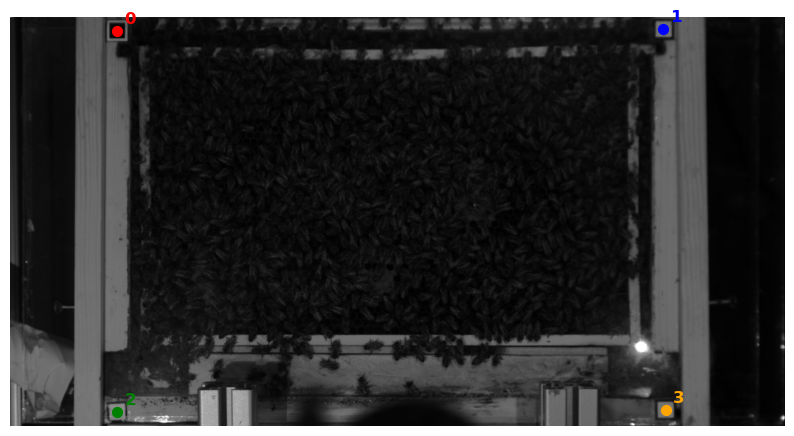

In [17]:
# visualize a single one
timestamps = df_markers_wdd['timestamp'].unique()
timestamp_to_show = timestamps[0]
dfsel = df_markers_wdd[df_markers_wdd['timestamp']==timestamp_to_show]
plot_markers_for_image(dfsel)